### Haar Feature-based Cascade Classifier

La detección de objetos mediante clasificadores en cascada basados en features "Haar" es un método eficaz de detección de objetos propuesto por Paul Viola y Michael Jones en su artículo, "Detección rápida de objetos mediante una cascada mejorada de características simples" en 2001. Es un enfoque basado en el aprendizaje automático en el que la función de cascada se entrena a partir de muchas imágenes positivas y negativas. Luego se usa para detectar objetos en otras imágenes.

Los Haar features funcionan similarmente a las capas convolucionales donde se buscan ciertos patrones. Cada feature es un valor único obtenido al restar la suma de píxeles debajo del rectángulo blanco de la suma de píxeles debajo del rectángulo negro.

<img src="img/haar_features.jpg" />


Considere la siguiente imagen. La fila superior muestra dos buenas características. La primera característica seleccionada parece centrarse en la propiedad de que la región de los ojos suele ser más oscura que la región de la nariz y las mejillas. La segunda característica seleccionada se basa en la propiedad de que los ojos son más oscuros que el puente de la nariz. Pero las mismas ventanas que se aplican en las mejillas o en cualquier otro lugar son irrelevantes. Entonces, ¿cómo seleccionamos las mejores de entre más de 160000 fetures? Con Adaboost!

<img src="img/haar.png" />

Adaboost usa una ventana que va moviendo para verificar los filtros. Por ejemplo en una ventana de 24x24 se pueden obtener hasta 6000 mil features. Eso quiere decir que cada movimiento de la ventana debe validar los 6000 features, y esto es algo ineficiente...

Para solucionar el problema, se introduce el concepto de clasificadores en cascada. En lugar de probar los 6000 mil filtros de una sola vez en la ventana, solamente se aplican algunos (digamos 1, 8, 16, 32, 48), si el resultado de esto filtros es negativo, osea no hay deteccion del objeto de interes, entonces la ventana se mueve al siguiente lugar y se descarta la ventana anterior. 

Para aprender mas sobre Adaboost, puede consultar el paper original: https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf

Para aprender a entrenar este algoritmo con OpenCV, puede consultar la siguiente referencia: https://docs.opencv.org/2.4/doc/user_guide/ug_traincascade.html

#### Beneficios de Haar Cascades

- Deteccion super veloz incluso con CPU. 
- el modelo se salva en un XML liviano.
- Disponible en OpenCV
- Ya existen varios modelos pre-entrenados (ver carpeta Haar)

#### Problemas de Haar Cascades

- Se debe generar archivos con etiquetas (Xmin, Ymin) - (Xmax, Ymax) para cada objeto de interes. (esto es lento de hacer)
- Se ocupan muchas imagenes positivas y negativas para entrenar el clasificador.
- Es tieso! si als imagenes tienen rotaciones, sombras, o bien tienen un scaling diferente el clasificador se va a perder.
- debe trabaja en blanco y negro.

In [2]:
# !conda install -c conda-forge opencv

import matplotlib.pyplot as plt
import numpy as np
import cv2

In [5]:
# cargar los modelos
face_cascade = cv2.CascadeClassifier('haar/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haar/haarcascade_eye.xml')

# se carga la imagen de prueba y se convierte en b/w
img = cv2.imread('img/obama.jpg') # probar con obama.jpg
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

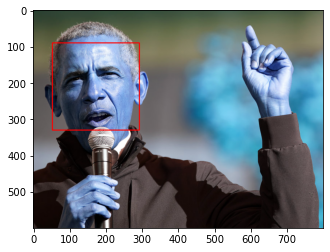

In [6]:
# reconocimiento de caras
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    
    # reconocimiento de ojos
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.imshow(img)